<a href="https://colab.research.google.com/github/CCanxue/CCanxue/blob/main/%E6%BF%80%E6%B4%BB%E5%87%BD%E6%95%B0%E4%B8%8E%E5%8D%95%E9%9A%90%E8%97%8F%E5%B1%82%E6%84%9F%E7%9F%A5%E5%99%A8%E5%AE%9E%E7%8E%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install d2l

In [ ]:
!pip install matplotlib

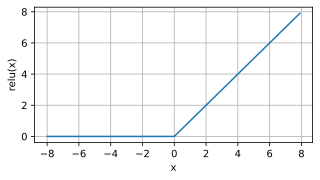

In [28]:
import torch
from d2l import torch as d2l
x=torch.arange(-8.0,8.0,0.1,requires_grad=True)
y=torch.relu(x)
d2l.plot(x.detach(),y.detach(),'x','relu(x)',figsize=(5,2.5))

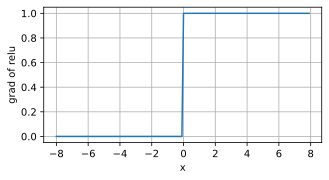

In [2]:
y.backward(torch.ones_like(x),retain_graph=True) #对一个变量，多次计算backward，会报错,这是因为第一次反向传播之后，这个计算图的内存就会被释放掉,这样的话再次进行反向传播就不行了，解决方法就是添加retain_graph=True这个参数。这里不加也可 
d2l.plot(x.detach(),x.grad,'x','grad of relu',figsize=(5,2.5))

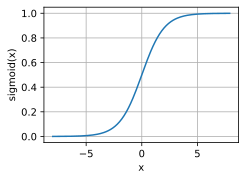

In [25]:
y=torch.sigmoid(x)
d2l.plot(x.detach(),y.detach(),"x","sigmoid(x)")

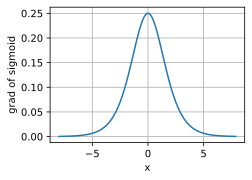

In [26]:
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
d2l.plot(x.detach(),x.grad,'x','grad of sigmoid')

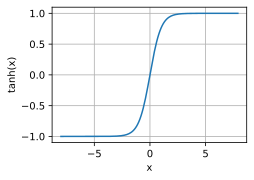

In [23]:
y=torch.tanh(x)
d2l.plot(x.detach(),y.detach(),"x","tanh(x)")

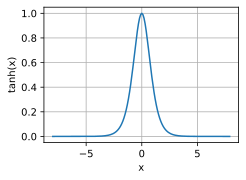

In [24]:
x.grad.data.zero_()
y.sum().backward()
d2l.plot(x.detach(),x.grad,"x","tanh(x)")

AssertionError: ignored

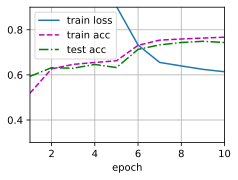

In [46]:
import torch
from torch import nn
from d2l import torch as d2l
batch_size=256
train_iter,test_iter=d2l.load_data_fashion_mnist(batch_size)
num_inputs,num_hiddens,num_outputs=784,256,10
W1=nn.Parameter(torch.randn((num_inputs,num_hiddens),requires_grad=True)*0.01)
b1=nn.Parameter(torch.zeros(num_hiddens,requires_grad=True))
W2=nn.Parameter(torch.randn(num_hiddens,num_outputs,requires_grad=True)*0.01)
b2=nn.Parameter(torch.zeros(num_outputs,requires_grad=True))
params = [W1, b1, W2, b2]
def relu(x):
  a=torch.zeros_like(x)
  return torch.max(x,a)
def net(x):
  x=x.reshape((-1,num_inputs))
  h=relu(torch.matmul(x,W1)+b1)
  return relu(h@W2+b2) #@s是矩阵乘积
loss = nn.CrossEntropyLoss(reduction='none')
num_epochs=10
lr=0.1
updater=torch.optim.SGD(params,lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,updater)